- Introduction
- Data Description
- Sources of Data and Method to extract them
- Methodology
- Result
- Discussion
- Conclusion

# Introduction
<p> Mumbai, formerly Bombay city, is the capital of Maharashtra state, southwestern India. It is the country’s financial and commercial hub and its principal port on the Arabian Sea.
Mumbai may be called the City of Dreams, but it is also the Financial capital of India because of the stock market centres. It is the Commercial capital of India because of its vast global reach, and it is the Entertainment capital of India because of Bollywood - the Hindi cinema industry. Mumbai is a Global city or an Alpha World city that acts as a primary connection for the global economic network.
<p>It suffers, however, from some of the perennial problems of many large expanding industrial cities: air and water pollution, widespread areas of substandard housing, and overcrowding.</p>

In [1]:
!pip install geopy

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# from geopy import Nominatim

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plot

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

ERROR: Invalid requirement: '#'


Libraries imported.


In [3]:
!pip install BeautifulSoup4
!pip install requests

In [4]:
import pandas as pd 
from bs4 import BeautifulSoup 
import requests
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai'
htmlurl = requests.get(url).text
soup = BeautifulSoup(htmlurl,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of neighbourhoods in Mumbai - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"01627fec-0b51-47df-b24b-38d6868e15d5","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighbourhoods_in_Mumbai","wgTitle":"List of neighbourhoods in Mumbai","wgCurRevisionId":1019667154,"wgRevisionId":1019667154,"wgArticleId":37060396,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: unfit URL","Harv and Sfn no-target errors","Use dmy dates from February 2019","U

In [5]:
extract_table = soup.find('table',{'class':'wikitable sortable'})
extract_table

<table class="wikitable sortable">
<tbody><tr>
<th>Area
</th>
<th>Location
</th>
<th>Latitude
</th>
<th>Longitude
</th></tr>
<tr>
<td>Amboli
</td>
<td>Andheri,Western Suburbs
</td>
<td>19.1293
</td>
<td>72.8434
</td></tr>
<tr>
<td>Chakala, Andheri
</td>
<td>Western Suburbs
</td>
<td>19.111388
</td>
<td>72.860833
</td></tr>
<tr>
<td>D.N. Nagar
</td>
<td>Andheri,Western Suburbs
</td>
<td>19.124085
</td>
<td>72.831373
</td></tr>
<tr>
<td>Four Bungalows
</td>
<td>Andheri,Western Suburbs
</td>
<td>19.124714
</td>
<td>72.82721
</td></tr>
<tr>
<td>Lokhandwala
</td>
<td>Andheri,Western Suburbs
</td>
<td>19.130815
</td>
<td>72.82927
</td></tr>
<tr>
<td>Marol
</td>
<td>Andheri,Western Suburbs
</td>
<td>19.119219
</td>
<td>72.882743
</td></tr>
<tr>
<td>Sahar
</td>
<td>Andheri,Western Suburbs
</td>
<td>19.098889
</td>
<td>72.867222
</td></tr>
<tr>
<td>Seven Bungalows
</td>
<td>Andheri,Western Suburbs
</td>
<td>19.129052
</td>
<td>72.817018
</td></tr>
<tr>
<td>Versova
</td>
<td>Andheri,Western Subu

In [6]:
table_headings=[]
for heading in extract_table.find_all('th'):
    table_headings.append(heading.text.replace('\n',' ').strip())

table_headings[0] = 'Neighborhood'

print(table_headings)


['Neighborhood', 'Location', 'Latitude', 'Longitude']


In [7]:
mumbai_neighborhood_table = pd.DataFrame(columns=table_headings, index = [0])
for row in extract_table.find_all('tr'):
    cols=[]
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    if len(cols) > 0:
        mumbai_neighborhood_table = mumbai_neighborhood_table.append({table_headings[0]:cols[0],table_headings[1]:cols[1],table_headings[2]:cols[2],table_headings[3]:cols[3]},ignore_index=True)

mumbai_neighborhood_table.drop(index=mumbai_neighborhood_table.index[0], axis=0, inplace=True)
mumbai_neighborhood_table

,Neighborhood,Location,Latitude,Longitude
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
2,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
3,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
4,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
5,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
6,Marol,"Andheri,Western Suburbs",19.119219,72.882743
7,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
8,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
9,Versova,"Andheri,Western Suburbs",19.12,72.82
10,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [8]:
print('The dataframe has {} location and {} neighborhoods.'.format(
        len(mumbai_neighborhood_table['Location'].unique()),
        mumbai_neighborhood_table.shape[0]
    )
)

The dataframe has 31 location and 93 neighborhoods.


<b>Retrieve property rates in various regions of mumbai from https://www.magicbricks.com/Property-Rates-Trends/ALL-RESIDENTIAL-rates-in-Mumbai website</b>

In [9]:
def retrieve_prices(url):

    htmlurl = requests.get(url).text
    soup = BeautifulSoup(htmlurl,'html.parser')
    # print(soup.prettify())

    extract_table1 = soup.find_all('table',{'class':'tbl'})
    extract_table1
    table_headings=[]
    for heading in extract_table1[0].find_all('th'):
        table_headings.append(heading.text.replace('\n',' ').strip())

    table_headings.remove('')
    table_headings.remove('Buy Rates')


    mumbai_housingprices_table1 = pd.DataFrame(columns = [table_headings[0], table_headings[2]], index = [0])
    for row in extract_table1[0].find_all('tr'):
        cols=[]
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        if len(cols) > 0:
            mumbai_housingprices_table1 = mumbai_housingprices_table1.append({table_headings[0]:cols[0],table_headings[2]:cols[2]},ignore_index=True)

    mumbai_housingprices_table1.drop(index=mumbai_housingprices_table1.index[0], axis=0, inplace=True)
    return(mumbai_housingprices_table1)


In [10]:
url = 'https://www.makaan.com/price-trends/property-rates-for-buy-in-mumbai'
MHP_table = retrieve_prices(url)
print(MHP_table)
for i in range(2, 30):
    url = 'https://www.makaan.com/price-trends/property-rates-for-buy-in-mumbai?page='+str(i)
    MHP_table = MHP_table.append(retrieve_prices(url))
MHP_table['Avg price per sqft'] = MHP_table['Avg price per sqft'].str.replace(' / sqft','')

MHP_table

       Locality Name  Avg price per sqft
1         Thane West  1,01,187.33 / sqft
2     Mira Road East    92,444.61 / sqft
3           Kharghar    56,700.82 / sqft
4            Chembur    39,984.16 / sqft
5     Kandivali East    68,358.17 / sqft
6              Powai    51,426.88 / sqft
7      Goregaon East    36,444.47 / sqft
8          Dombivali    14,877.86 / sqft
9               Ulwe    61,486.98 / sqft
10      Andheri East       54,111 / sqft
11             Virar    11,771.18 / sqft
12            Panvel    27,260.07 / sqft
13      Andheri West    61,324.84 / sqft
14       Mulund West    29,609.91 / sqft
15        Malad West     35,24.56 / sqft
16       Kalyan West    18,820.82 / sqft
17     Borivali West     54,33.26 / sqft
18       Bandra West  1,26,661.22 / sqft
19           Dahisar    63,805.44 / sqft
20      Bhandup West    26,156.95 / sqft
21           Kamothe    48,976.97 / sqft
22     Borivali East    74,882.71 / sqft
23    Kandivali West    30,517.83 / sqft
24        Malad 

,Locality Name,Avg price per sqft
1,Thane West,"1,01,187.33"
2,Mira Road East,"92,444.61"
3,Kharghar,"56,700.82"
4,Chembur,"39,984.16"
5,Kandivali East,"68,358.17"
6,Powai,"51,426.88"
7,Goregaon East,"36,444.47"
8,Dombivali,"14,877.86"
9,Ulwe,"61,486.98"
10,Andheri East,"54,111"


In [11]:
MHP_table['Avg price per sqft'] = MHP_table['Avg price per sqft'].str.replace(',','')
MHP_table['Avg price per sqft'] = MHP_table['Avg price per sqft'].str.replace('-','0')
MHP_table['Avg price per sqft'] = MHP_table['Avg price per sqft'].astype('float')

MHP_table

,Locality Name,Avg price per sqft
1,Thane West,101187.33
2,Mira Road East,92444.61
3,Kharghar,56700.82
4,Chembur,39984.16
5,Kandivali East,68358.17
6,Powai,51426.88
7,Goregaon East,36444.47
8,Dombivali,14877.86
9,Ulwe,61486.98
10,Andheri East,54111.00


In [12]:
print("Shape of the Data is", MHP_table.shape)

Shape of the Data is (1740, 2)


<b>Merge MHP_table and mumbai_neighborhood_table dataframes</b>

In [13]:
MHP_table = MHP_table.rename(columns = {'Locality Name':'Neighborhood'})
MHP_table1 = pd.merge(mumbai_neighborhood_table, MHP_table, on = 'Neighborhood', how = 'inner')
mumbai_property_rates_data = MHP_table1.drop(columns = ['Location','Latitude','Longitude'])
mumbai_property_rates_data

,Neighborhood,Avg price per sqft
0,Amboli,34854.80
1,Amboli,21767.94
2,Four Bungalows,31561.22
3,Lokhandwala,21588.17
4,Marol,25992.78
5,Versova,34733.09
6,Mira Road,18776.21
7,Uttan,2735.00
8,Kherwadi,16158.19
9,Pali Hill,5283.26


<b>Use geopy library to get the latitude and longitude values of Mumbai City.</b>

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>mumbai_explorer</em>, as shown below.

In [14]:
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="mumbai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai City are 19.0759899, 72.8773928.


<b>Create a map of Mumbai with neighborhoods superimposed on top.</b>

In [15]:
# create map of New York using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(mumbai_neighborhood_table['Latitude'], mumbai_neighborhood_table['Longitude'], mumbai_neighborhood_table['Location'], mumbai_neighborhood_table['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

<b>Define Foursquare Credentials and Version</b>

In [16]:
CLIENT_ID = 'YKKTFX3EXUTDDRXN4G51IGWUS2BPPBKBJWQCZH1L4LNSIF05' # your Foursquare ID
CLIENT_SECRET = 'YXHN1QGIXM41KYBWXROIRCB0N34LB0ZVAHVOUURXFCVHUSRI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YKKTFX3EXUTDDRXN4G51IGWUS2BPPBKBJWQCZH1L4LNSIF05
CLIENT_SECRET:YXHN1QGIXM41KYBWXROIRCB0N34LB0ZVAHVOUURXFCVHUSRI


<b>Now, let's get the top 100 venues that are in Mumbai within a radius of 500 meters.</b>

First, let's create the GET request URL. Name your URL url.

In [17]:
# type your answer here
LIMIT=100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YKKTFX3EXUTDDRXN4G51IGWUS2BPPBKBJWQCZH1L4LNSIF05&client_secret=YXHN1QGIXM41KYBWXROIRCB0N34LB0ZVAHVOUURXFCVHUSRI&v=20180605&ll=19.0759899,72.8773928&radius=500&limit=100'

Send the GET request and examine the resutls

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ce49f0d6ebad3d2e90c711'},
 'response': {'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 19.080489904500006,
    'lng': 72.88214538622687},
   'sw': {'lat': 19.071489895499994, 'lng': 72.87264021377312}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c5c33c32815c928e04fb167',
       'name': 'Delhi Zaika',
       'location': {'address': 'Opp. Kalapana Theatre',
        'crossStreet': 'LBS Marg',
        'lat': 19.077053790599823,
        'lng': 72.87826023582745,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.077053790599823,
          'lng': 72.87826023582745}],
        'distance': 149,
        'postal

## 2. Explore Neighborhoods in Mumbai

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<b>Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.</b>

In [20]:
# type your answer here
mumbai_venues = getNearbyVenues(names = mumbai_neighborhood_table['Neighborhood'],
                                   latitudes = mumbai_neighborhood_table['Latitude'],
                                   longitudes = mumbai_neighborhood_table['Longitude']
                                  )

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


<b>Let's check the size of the resulting dataframe</b>

In [21]:
print(mumbai_venues.shape)
mumbai_venues.head()

(1227, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,19.1293,72.8434,Apple Service Centre,19.128036,72.842718,IT Services


In [22]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 176 uniques categories.


## 3. Analyze Each Neighborhood

#### Analyze housing data of each neighborhood

<AxesSubplot:xlabel='Neighborhood'>

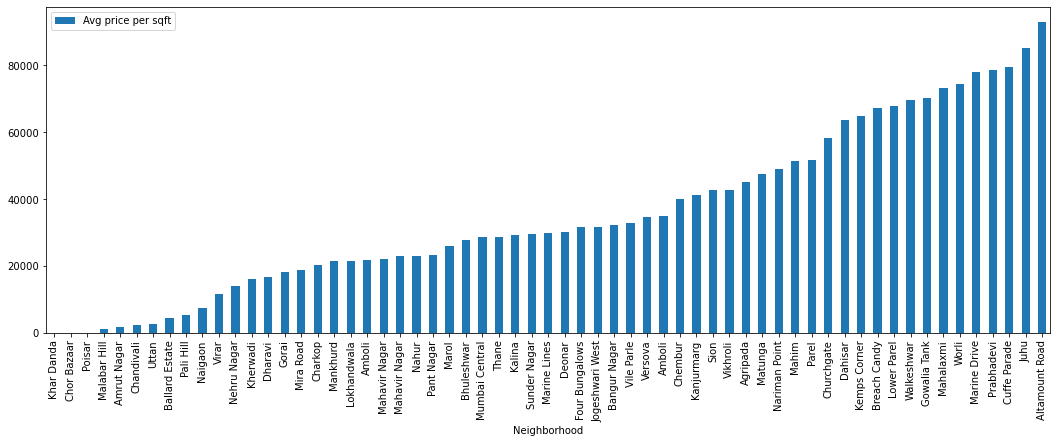

In [53]:
mumbai_property_rates_data.sort_values('Avg price per sqft',inplace=True)
mumbai_property_rates_data.plot(x="Neighborhood", y="Avg price per sqft", kind="bar",figsize=(18,6))

<b>Let's visualize housing prices data of mumbai neighborhoods.</b>

In [28]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Yoga Studio,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Cafeteria,Café,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Event Space,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Neighborhood,Noodle House,North Indian Restaurant,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Trail,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
mumbai_onehot.shape

(1227, 176)

<b>Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category</b>

In [30]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped

,Neighborhood,Yoga Studio,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Cafeteria,Café,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Event Space,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Noodle House,North Indian Restaurant,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Theater,Trail,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Agripada,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.200000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Altamount Road,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000,0.0,0.0

In [31]:
mumbai_grouped.shape

(85, 176)

<b>Let's print each neighborhood along with the top 5 most common venues</b>

In [32]:
num_top_venues = 5

for hood in mumbai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agripada----
               venue  freq
0        Coffee Shop   0.2
1  Indian Restaurant   0.2
2               Pool   0.2
3       Cupcake Shop   0.2
4                Gym   0.2


----Altamount Road----
                  venue  freq
0                  Café  0.22
1           Coffee Shop  0.11
2     Indian Restaurant  0.11
3                   Spa  0.11
4  Fast Food Restaurant  0.11


----Amboli----
               venue  freq
0   Asian Restaurant  0.12
1  Indian Restaurant  0.12
2        IT Services  0.12
3        Coffee Shop  0.12
4   Halal Restaurant  0.12


----Amrut Nagar----
                  venue  freq
0     Indian Restaurant  0.12
1                  Café  0.12
2  Fast Food Restaurant  0.06
3        Clothing Store  0.06
4         Bowling Alley  0.03


----Asalfa----
                     venue  freq
0               Playground  0.33
1               Campground  0.33
2              Bus Station  0.33
3              Pizza Place  0.00
4  North Indian Restaurant  0.00


----Ballard Estate

                venue  freq
0        Soccer Field   1.0
1         Yoga Studio   0.0
2          Playground   0.0
3  Miscellaneous Shop   0.0
4   Mobile Phone Shop   0.0


----Pali Hill----
                  venue  freq
0                Bakery  0.08
1          Cupcake Shop  0.08
2          Dessert Shop  0.08
3  Fast Food Restaurant  0.08
4    Dim Sum Restaurant  0.06


----Pali Naka----
                venue  freq
0   Indian Restaurant  0.15
1              Bakery  0.09
2         Coffee Shop  0.06
3  Seafood Restaurant  0.06
4       Deli / Bodega  0.06


----Pant Nagar----
               venue  freq
0  Indian Restaurant  0.24
1     Ice Cream Shop  0.12
2        Snack Place  0.12
3         Food Truck  0.12
4  Electronics Store  0.06


----Parel----
               venue  freq
0              Plaza  0.25
1         Whisky Bar  0.25
2  Indian Restaurant  0.25
3   Asian Restaurant  0.25
4           Pharmacy  0.00


----Poisar----
               venue  freq
0        Coffee Shop   0.2
1  Mobile Ph

First, let's write a function to sort the venues in descending order.

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,Coffee Shop,Indian Restaurant,Pool,Cupcake Shop,Gym,North Indian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex
1,Altamount Road,Café,Coffee Shop,Indian Restaurant,Spa,Fast Food Restaurant,Sandwich Place,Theater,Bakery,Noodle House,Movie Theater
2,Amboli,Asian Restaurant,Indian Restaurant,IT Services,Coffee Shop,Halal Restaurant,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,North Indian Restaurant,Movie Theater
3,Amrut Nagar,Indian Restaurant,Café,Fast Food Restaurant,Clothing Store,Bowling Alley,Restaurant,Bookstore,Multiplex,Sandwich Place,Chinese Restaurant
4,Asalfa,Playground,Campground,Bus Station,Pizza Place,North Indian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store


## Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [35]:
# set number of clusters
kclusters = 5

mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 3, 4, 3, 3, 3, 0, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [37]:
mumbai_merged = mumbai_neighborhood_table

# merge mumbai_grouped with mumbai_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mumbai_merged.head() # check the last columns!

,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,3.0,Asian Restaurant,Indian Restaurant,IT Services,Coffee Shop,Halal Restaurant,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,North Indian Restaurant,Movie Theater
2,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,3.0,Hotel,Restaurant,Wine Shop,Pizza Place,Cocktail Bar,Punjabi Restaurant,Multiplex,Fast Food Restaurant,Asian Restaurant,Salon / Barbershop
3,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,3.0,Lounge,Indian Restaurant,Pizza Place,Gym / Fitness Center,Electronics Store,Bus Line,Arts & Entertainment,Snack Place,Light Rail Station,Yoga Studio
4,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721,3.0,Women's Store,Arts & Entertainment,Playground,Park,Residential Building (Apartment / Condo),Fish Market,Smoke Shop,Market,Sports Club,Bakery
5,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927,3.0,Coffee Shop,Lounge,Restaurant,Accessories Store,Indian Restaurant,Light Rail Station,Liquor Store,Market,Department Store,Pizza Place


In [38]:
mumbai_merged = mumbai_merged.dropna()
mumbai_merged = mumbai_merged.astype({'Cluster Labels':'int'})

Finally, let's visualize the resulting clusters

In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']


## Examine Clusters

#### Cluster 1

In [40]:
cluster1 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[0] + list(range(5, mumbai_merged.shape[1]))]]
cluster1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Uttan,Beach,Bus Station,Playground,Indian Restaurant,Resort,North Indian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex
17,Gorai,Resort,Indian Restaurant,Aquarium,Seafood Restaurant,Yoga Studio,Noodle House,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target
28,Khar Danda,Indian Restaurant,Bar,Pub,Lounge,Grocery Store,Gastropub,Fast Food Restaurant,Cosmetics Shop,Restaurant,Salon / Barbershop
30,Sunder Nagar,Indian Restaurant,Coffee Shop,American Restaurant,Chinese Restaurant,Department Store,Gym / Fitness Center,Café,Lounge,Outdoors & Recreation,Moving Target
33,Nalasopara,Bus Station,Indian Restaurant,Bar,Yoga Studio,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue
35,Irla,Indian Restaurant,Ice Cream Shop,Café,Seafood Restaurant,Fast Food Restaurant,Sandwich Place,Juice Bar,Gym,Electronics Store,Snack Place
37,Bhandup,Indian Restaurant,Hotel,Arcade,Café,Shopping Mall,Sports Bar,Fried Chicken Joint,Pizza Place,Vegetarian / Vegan Restaurant,Mobile Phone Shop
40,Pant Nagar,Indian Restaurant,Ice Cream Shop,Snack Place,Food Truck,Electronics Store,Diner,Park,Shopping Mall,Women's Store,Coffee Shop
43,Nahur,Indian Restaurant,Restaurant,Ice Cream Shop,North Indian Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store
46,Indian Institute of Technology Bombay campus,Indian Restaurant,Coffee Shop,Bakery,Event Space,Concert Hall,Italian Restaurant,Japanese Restaurant,Moving Target,Multiplex,Music Store


In [41]:
venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']).append(
    cluster1['8th Most Common Venue']).append(
    cluster1['9th Most Common Venue']).append(
    cluster1['10th Most Common Venue']))

print(venues1.value_counts().head(10))


Indian Restaurant       29
Movie Theater           17
Moving Target           16
Monument / Landmark     15
Multiplex               12
Coffee Shop             11
Fast Food Restaurant    10
Café                     9
Mobile Phone Shop        8
Music Store              8
dtype: int64


#### Cluster 2

In [42]:
cluster2 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[0] + list(range(5, mumbai_merged.shape[1]))]]
cluster2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
82,Navy Nagar,Soccer Field,Yoga Studio,Playground,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store


In [43]:
venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']).append(
    cluster2['8th Most Common Venue']).append(
    cluster2['9th Most Common Venue']).append(
    cluster2['10th Most Common Venue']))

print(venues2.value_counts().head(10))


Movie Theater          1
Music Store            1
Soccer Field           1
Miscellaneous Shop     1
Multiplex              1
Playground             1
Yoga Studio            1
Mobile Phone Shop      1
Monument / Landmark    1
Moving Target          1
dtype: int64


#### Cluster 3

In [44]:
cluster3 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[0] + list(range(5, mumbai_merged.shape[1]))]]
cluster3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,Kanjurmarg,Multiplex,Yoga Studio,Noodle House,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Music Store,Music Venue


In [45]:
venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']).append(
    cluster3['8th Most Common Venue']).append(
    cluster3['9th Most Common Venue']).append(
    cluster3['10th Most Common Venue']))

print(venues3.value_counts().head(10))


Movie Theater          1
Music Store            1
Music Venue            1
Noodle House           1
Multiplex              1
Miscellaneous Shop     1
Yoga Studio            1
Mobile Phone Shop      1
Monument / Landmark    1
Moving Target          1
dtype: int64


#### Cluster 4

In [46]:
cluster4 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[0] + list(range(5, mumbai_merged.shape[1]))]]
cluster4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Amboli,Asian Restaurant,Indian Restaurant,IT Services,Coffee Shop,Halal Restaurant,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,North Indian Restaurant,Movie Theater
2,"Chakala, Andheri",Hotel,Restaurant,Wine Shop,Pizza Place,Cocktail Bar,Punjabi Restaurant,Multiplex,Fast Food Restaurant,Asian Restaurant,Salon / Barbershop
3,D.N. Nagar,Lounge,Indian Restaurant,Pizza Place,Gym / Fitness Center,Electronics Store,Bus Line,Arts & Entertainment,Snack Place,Light Rail Station,Yoga Studio
4,Four Bungalows,Women's Store,Arts & Entertainment,Playground,Park,Residential Building (Apartment / Condo),Fish Market,Smoke Shop,Market,Sports Club,Bakery
5,Lokhandwala,Coffee Shop,Lounge,Restaurant,Accessories Store,Indian Restaurant,Light Rail Station,Liquor Store,Market,Department Store,Pizza Place
6,Marol,Indian Restaurant,Bakery,Snack Place,Convenience Store,Diner,Flea Market,Restaurant,Department Store,Chinese Restaurant,Asian Restaurant
8,Seven Bungalows,Café,Pub,Chinese Restaurant,Ice Cream Shop,Seafood Restaurant,Bar,Coffee Shop,Electronics Store,Park,Bistro
9,Versova,Soccer Stadium,Bar,Fast Food Restaurant,Music Venue,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex
10,Mira Road,Pizza Place,Chinese Restaurant,Vegetarian / Vegan Restaurant,Café,Yoga Studio,Noodle House,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target
11,Bhayandar,Shipping Store,Yoga Studio,Playground,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store


In [47]:
venues4 = (cluster4['1st Most Common Venue'].append(
    cluster4['2nd Most Common Venue']).append(
    cluster4['3rd Most Common Venue']).append(
    cluster4['4th Most Common Venue']).append(
    cluster4['5th Most Common Venue']).append(
    cluster4['6th Most Common Venue']).append(
    cluster4['7th Most Common Venue']).append(
    cluster4['8th Most Common Venue']).append(
    cluster4['9th Most Common Venue']).append(
    cluster4['10th Most Common Venue']))

print(venues4.value_counts().head(10))


Indian Restaurant       29
Fast Food Restaurant    28
Café                    26
Coffee Shop             23
Movie Theater           20
Bakery                  17
Chinese Restaurant      17
Bar                     15
Moving Target           14
Multiplex               13
dtype: int64


#### Cluster 5

In [48]:
cluster5 = mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[0] + list(range(5, mumbai_merged.shape[1]))]]
cluster5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Asalfa,Playground,Campground,Bus Station,Pizza Place,North Indian Restaurant,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Music Store


In [49]:
venues5 = (cluster5['1st Most Common Venue'].append(
    cluster5['2nd Most Common Venue']).append(
    cluster5['3rd Most Common Venue']).append(
    cluster5['4th Most Common Venue']).append(
    cluster5['5th Most Common Venue']).append(
    cluster5['6th Most Common Venue']).append(
    cluster5['7th Most Common Venue']).append(
    cluster5['8th Most Common Venue']).append(
    cluster5['9th Most Common Venue']).append(
    cluster5['10th Most Common Venue']))

print(venues5.value_counts().head(10))


Movie Theater              1
Music Store                1
Multiplex                  1
North Indian Restaurant    1
Bus Station                1
Playground                 1
Campground                 1
Pizza Place                1
Monument / Landmark        1
Moving Target              1
dtype: int64


# Results and Discussion

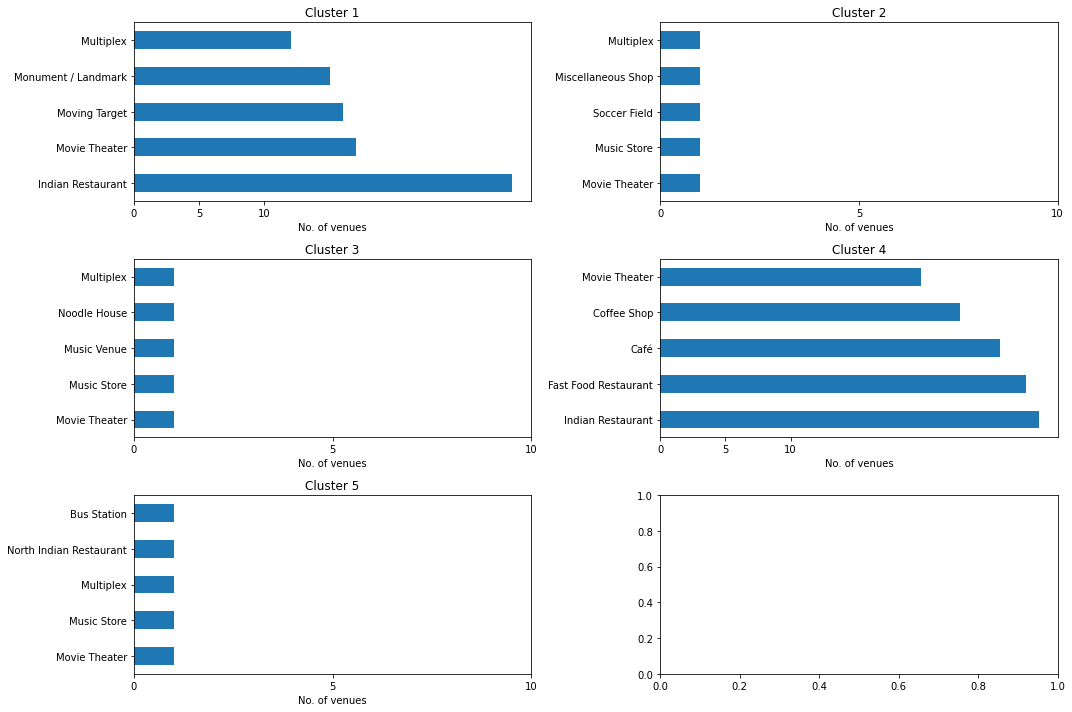

In [50]:
df_list = [venues1 ,venues2, venues3, venues4, venues5]
fig, axes = plot.subplots(3, 2)

count = 0
for r in range(3):
    for c in range(2):
        if r != 2 or c != 1:
            df_list[count].value_counts().head().plot.barh(ax = axes[r,c], width=0.5, figsize=(15,10))
            axes[r,c].set_title('Cluster {}'.format(count+1))
            plot.sca(axes[r, c])
            plot.xticks(np.arange(0, 15, 5))
            plot.xlabel('No. of venues')
            count += 1

fig.tight_layout()

<p>From housing prices analysis plot, we can summarize housing rates in Altamount Road neighborhood are costly.</p>
<p>From cluste analysis plots, we can summarize that 
    <ol>
<li> Cluster 1 contains more number of mulitplex, coffee shops, indian resturants, Cafe and Food Resturants. </li>
<li> Cluster 2 has more number of multiplex, fast food restaurant, nightclub, Movie theater and Mughalai Restaurants.</li>
<li> Cluster 3 has more number of music store, multiplex, cafe, Coffee Shop and Indian Restaurants.</li>
<li> Cluster 4 has more number of Yoga Studio, Indian restaurant, multiplex, Bus Station and Mughalai Restaurants.</li>
<li> Cluster 5 has more number of multiplex, Movie theater, nightclub, garden and Mughalai Restaurants.</li>
        </ol>
        </p>


## 7. Conclusion
<p>
    <ol>
        <li>If person is interested to have mulitplex, coffee shops, indian resturants, Cafe and Food Resturants nearer to his house, then he can choose place from cluster 1 like Uttan, Gorai, etc. But at the same time he has to see the budget to purchase a house.</li>
        <li>If person is interested to have multiplex, fast food restaurant, nightclub, Movie theater and Mughalai Restaurants nearer to his house, then he can choose place from cluster 2 like Uttan, Gorai, etc.</li>
        <li>If person is interested to have music store, multiplex, cafe, Coffee Shop and Indian Restaurants nearer to his house, then he can choose place from cluster 3 like Uttan, Gorai, etc.</li>
        <li>If person is interested to have Yoga Studio, Indian restaurant, multiplex, Bus Station and Mughalai Restaurants nearer to his house, then he can choose place from cluster 4 like Uttan, Gorai, etc.</li>
        <li>If person is interested to have multiplex, Movie theater, nightclub, garden and Mughalai Restaurants nearer to his house, then he can choose place from cluster 5 like Uttan, Gorai, etc.</li>
        </ol>
    </p>